In [55]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd # type: ignore
pd.set_option("display.max_columns", None)

import matplotlib.pyplot as plt
import scipy.stats as stats

In [56]:
def col_domain(df, col):
    return df[col].unique()


def cols_with_missing_vals(df):
    missing_vals = df.isnull().sum()
    
    print(missing_vals[missing_vals > 0])


def impute_occupation_level(row):
    if row['Field of occupation'] == 'Unoccupied' and pd.isnull(row['Occupation level']):
        return 'Unoccupied'
    elif pd.isnull(row['Occupation level']):
        return df.loc[df['Field of occupation'] == row['Field of occupation'], 'Occupation level'].mode().iloc[0] # type: ignore
    else:
        return row['Occupation level']


def handle_missing_vals(df):
    df['Occupation level'] = df.apply(impute_occupation_level, axis='columns')

    df.dropna(axis='index', subset=['Country of residence'], inplace=True)

    df['S3Q11'].fillna('Other', inplace=True)

    df['S3Q12'].fillna('No', inplace=True)


def handle_inconsistencies(df):
    df['Education level'] = df['Education level'].replace('Masters', 'Completed Undergraduate Degree')

    df['Occupation level'] = df['Occupation level'].replace('Mid level', 'Middle level')
    
    df = df[~df['S3Q8'].str.startswith('I think')]
    df['S3Q8'] = df['S3Q8'].str.strip()

    df['S3Q11'] = df['S3Q11'].str.replace('.', '')
    df['S3Q11'] = df['S3Q11'].str.strip()
    
    return df


def unwrap_mcqs(df):
    target_col = 'S3Q8'
    
    dummies = df[target_col].str.get_dummies(', ').astype(int)

    cust_col_names = {
        'An overall explanation of how the AI system works - once for the application': 'S3Q8C1',
        'An explanation for every decision made by the AI system - once per decision': 'S3Q8C2',
        'Explanation per decision if requested': 'S3Q1C3'
    }

    dummies.columns = dummies.columns.str.strip()
    dummies = dummies.rename(columns=cust_col_names)
    # display(dummies.head())

    df = pd.concat([df.drop(target_col, axis='columns'), dummies], axis='columns')


    target_col = 'S3Q11'
    
    dummies = df[target_col].str.get_dummies(', ').astype(int)

    cust_col_names = {
        'Easy to understand - Expect no technical expertise from me': 'S3Q11C1',
        'Faithful - Reflect the actual reasoning of the AI system': 'S3Q11C2',
        'Descriptive - State precisely what cause the AI system decision without leaving room for ambiguity': 'S3Q11C3',
        'Consistent - Provide similar explanations for similar/neighboring examples': 'S3Q11C4',
        'Discriminative - State Specific reasons influence the different decisions of AI system': 'S3Q11C5',
        'Interactive - Allow me to understand reasoning of the AI system in different granularities': 'S3Q11C6',
        "I'd like to see other options that I have in some scenarios (maybe percentage wise)": 'S3Q11C7',
        'I would like to have easy to understand explanations but with some technical aspects as well': 'S3Q11C8',
        'It depends on the scenario/context different scenarios require different explanation level': 'S3Q11C9',
        'Be transparent about potential biases associated with both the results and explanations': 'S3Q11C10',
        'I expect explanations to be infrequent (or rate to exponentially decay) and only generate explanations when previously provided explanations are not sufficient to explain the current scenario': 'S3Q11C11',
        'Other': 'S3Q11C12'
    }

    dummies.columns = dummies.columns.str.strip()
    dummies = dummies.rename(columns=cust_col_names)
    # display(dummies.head())

    df = pd.concat([df.drop(target_col, axis='columns'), dummies], axis='columns')

    return df

In [57]:
df = pd.read_csv("data.csv")

In [58]:
display(df.describe())
display(df.head())

print(*df.columns, sep='\n', end='\n\n')
cols_with_missing_vals(df)

,Age,S3Q7P1,S3Q7P2,S3Q7P3,S3Q7P4,S3Q7P5,S3Q10P1,S3Q10P2,S3Q10P3,S3Q10P4,S3Q10P5
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,31.495413,2.262997,2.045872,2.657492,3.226300,3.241590,2.168196,2.070336,2.574924,3.103976,3.354740
std,7.338808,1.217689,1.457277,1.210434,1.362574,1.422771,1.220667,1.302878,1.115857,1.273208,1.464142
min,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,28.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000
50%,32.000000,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000
75%,33.000000,3.000000,3.000000,3.000000,4.000000,5.000000,3.000000,3.000000,3.000000,4.000000,5.000000
max,68.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


,Timestamp,Gender,Age,Education level,Field of occupation,Occupation level,Country of residence,S2Q1,S2Q2,S2Q3,S2Q4,S3Q1,S3Q2,S3Q3,S3Q4,S3Q5,S3Q6,S3Q7P1,S3Q7P2,S3Q7P3,S3Q7P4,S3Q7P5,S3Q8,S3Q9,S3Q10P1,S3Q10P2,S3Q10P3,S3Q10P4,S3Q10P5,S3Q11,S3Q12
0,3/21/2022 19:53:12,Female,31,Completed Undergraduate Degree,Architecture and Engineering,Entry level,Singapore,Email,Yes,No,Yes,Very important,I need an explanation for both decisions,(b),(b),(a),(a),1,1,1,3,1,An explanation for every decision made by the ...,An explanation explaining why AI made a certai...,2,1,3,4,5,Easy to understand - Expect no technical exper...,What happens when a person doesn't agree with ...
1,3/21/2022 20:12:56,Female,24,Completed Undergraduate Degree,Unoccupied,Unoccupied,Singapore,Email,Yes,No,Yes,Important,I need an explanation when I do not get the de...,(a),(a),(a),(a),1,3,4,5,2,An overall explanation of how the AI system wo...,An explanation explaining why AI made a certai...,2,1,3,4,5,Easy to understand - Expect no technical exper...,NaN
2,3/21/2022 20:18:00,Female,31,Completed Undergraduate Degree,Computer and Mathematical,Student,Singapore,Email,Yes,Yes,Yes,Neutral,I need an explanation for both decisions,(a),(b),(a),(a),4,5,2,3,1,An overall explanation of how the AI system wo...,An explanation explaining why AI made a certai...,2,3,1,5,4,Easy to understand - Expect no technical exper...,NaN
3,3/21/2022 20:18:37,Female,26,Completed Undergraduate Degree,Computer and Mathematical,Unoccupied,Singapore,Email,Yes,Yes,Yes,Important,I need an explanation when I do not get the de...,(b),(a),(a),(a),5,4,3,2,1,An overall explanation of how the AI system wo...,An explanation explaining why AI made a certai...,3,1,2,4,5,Easy to understand - Expect no technical exper...,NaN
4,3/21/2022 20:33:45,Male,32,Completed Undergraduate Degree,Other,Executive level,Singapore,Email,Yes,No,Yes,Very important,I need an explanation for both decisions,(b),(b),(a),(a),1,2,4,5,3,An overall explanation of how the AI system wo...,An explanation explaining why AI made a certai...,4,2,1,3,5,Easy to understand - Expect no technical exper...,NaN


Timestamp
Gender
Age
Education level
Field of occupation
Occupation level
Country of residence
S2Q1
S2Q2
S2Q3
S2Q4
S3Q1
S3Q2
S3Q3
S3Q4
S3Q5
S3Q6
S3Q7P1
S3Q7P2
S3Q7P3
S3Q7P4
S3Q7P5
S3Q8
S3Q9
S3Q10P1
S3Q10P2
S3Q10P3
S3Q10P4
S3Q10P5
S3Q11
S3Q12

Occupation level          6
Country of residence      1
S3Q11                     2
S3Q12                   289
dtype: int64


In [59]:
# print(*col_domain(df, 'S3Q1'), sep='\n', end='\n\n')

# handle_missing_vals(df)
# df = handle_inconsistencies(df)
# df = unwrap_mcqs(df)

display(df.head())

,Timestamp,Gender,Age,Education level,Field of occupation,Occupation level,Country of residence,S2Q1,S2Q2,S2Q3,S2Q4,S3Q1,S3Q2,S3Q3,S3Q4,S3Q5,S3Q6,S3Q7P1,S3Q7P2,S3Q7P3,S3Q7P4,S3Q7P5,S3Q8,S3Q9,S3Q10P1,S3Q10P2,S3Q10P3,S3Q10P4,S3Q10P5,S3Q11,S3Q12
0,3/21/2022 19:53:12,Female,31,Completed Undergraduate Degree,Architecture and Engineering,Entry level,Singapore,Email,Yes,No,Yes,Very important,I need an explanation for both decisions,(b),(b),(a),(a),1,1,1,3,1,An explanation for every decision made by the ...,An explanation explaining why AI made a certai...,2,1,3,4,5,Easy to understand - Expect no technical exper...,What happens when a person doesn't agree with ...
1,3/21/2022 20:12:56,Female,24,Completed Undergraduate Degree,Unoccupied,Unoccupied,Singapore,Email,Yes,No,Yes,Important,I need an explanation when I do not get the de...,(a),(a),(a),(a),1,3,4,5,2,An overall explanation of how the AI system wo...,An explanation explaining why AI made a certai...,2,1,3,4,5,Easy to understand - Expect no technical exper...,NaN
2,3/21/2022 20:18:00,Female,31,Completed Undergraduate Degree,Computer and Mathematical,Student,Singapore,Email,Yes,Yes,Yes,Neutral,I need an explanation for both decisions,(a),(b),(a),(a),4,5,2,3,1,An overall explanation of how the AI system wo...,An explanation explaining why AI made a certai...,2,3,1,5,4,Easy to understand - Expect no technical exper...,NaN
3,3/21/2022 20:18:37,Female,26,Completed Undergraduate Degree,Computer and Mathematical,Unoccupied,Singapore,Email,Yes,Yes,Yes,Important,I need an explanation when I do not get the de...,(b),(a),(a),(a),5,4,3,2,1,An overall explanation of how the AI system wo...,An explanation explaining why AI made a certai...,3,1,2,4,5,Easy to understand - Expect no technical exper...,NaN
4,3/21/2022 20:33:45,Male,32,Completed Undergraduate Degree,Other,Executive level,Singapore,Email,Yes,No,Yes,Very important,I need an explanation for both decisions,(b),(b),(a),(a),1,2,4,5,3,An overall explanation of how the AI system wo...,An explanation explaining why AI made a certai...,4,2,1,3,5,Easy to understand - Expect no technical exper...,NaN


## Hypothesis Testing

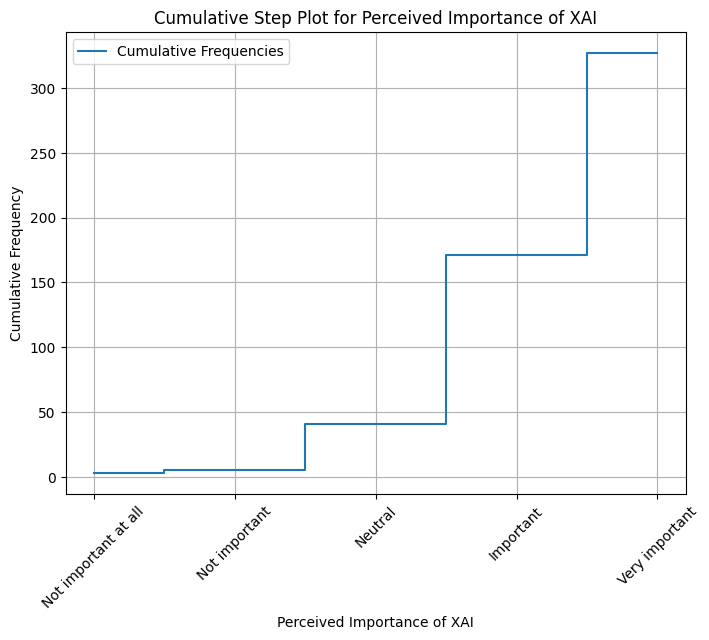

In [60]:
ordered_values = ["Not important at all", "Not important", "Neutral", "Important", "Very important"]

value_counts = df['S3Q1'].value_counts().reindex(ordered_values).cumsum()

plt.figure(figsize=(8, 6))
plt.step(ordered_values, value_counts, where='mid', label='Cumulative Frequencies')
plt.xlabel('Perceived Importance of XAI')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative Step Plot for Perceived Importance of XAI')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [61]:
def xai_importance_by(df, col):
    ordered_values = ["Not important at all", "Not important", "Neutral", "Important", "Very important"]

    plt.figure(figsize=(10, 8))

    for gender in df[col].unique():
        filtered_df = df[df[col] == gender]
        value_counts = filtered_df['S3Q1'].value_counts().reindex(ordered_values).fillna(0).cumsum()
        plt.step(ordered_values, value_counts, where='mid', label=gender)

    plt.xlabel('Perceived Importance of XAI')
    plt.ylabel('Cumulative Frequency')
    plt.title(f'Cumulative Step Plot for Perceived Importance of XAI by {col}')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend(title=col)
    plt.show()

    df['S3Q1'] = pd.Categorical(df['S3Q1'], categories=ordered_values, ordered=True)

    table = pd.crosstab(df['S3Q1'], df[col], normalize='columns')

    plt.figure(figsize=(10, 8))
    table.plot(kind='bar', stacked=False)
    plt.xlabel('Perceived Importance of XAI')
    plt.ylabel('Proportion')
    plt.title(f'Proportion of Perceived Importance of XAI by {col}')
    plt.xticks(rotation=45)
    plt.legend(title=col)
    plt.show()

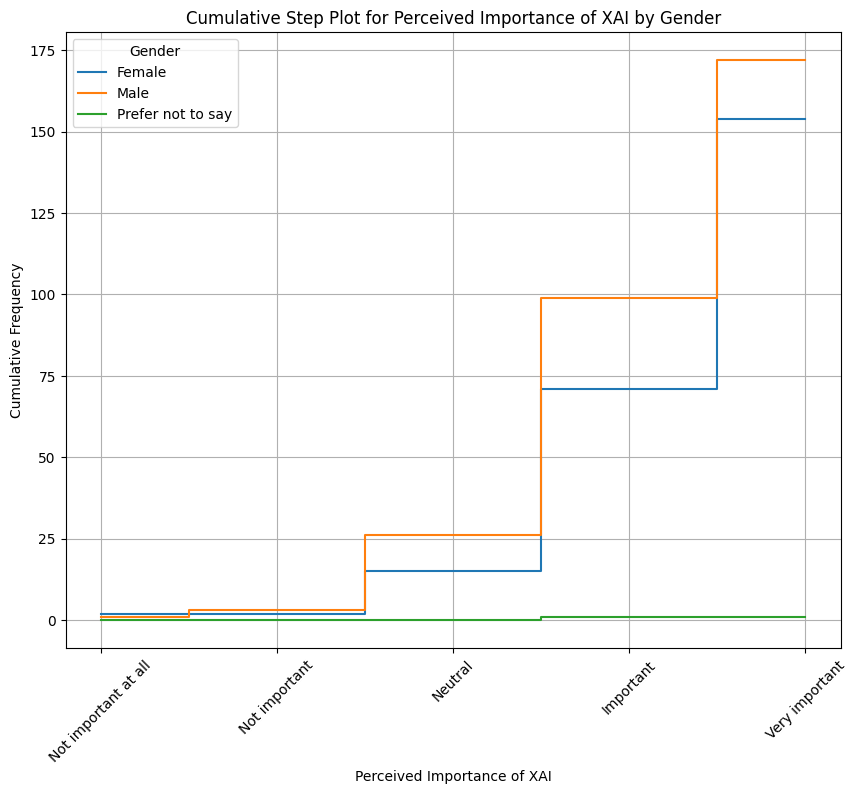

<Figure size 1000x800 with 0 Axes>

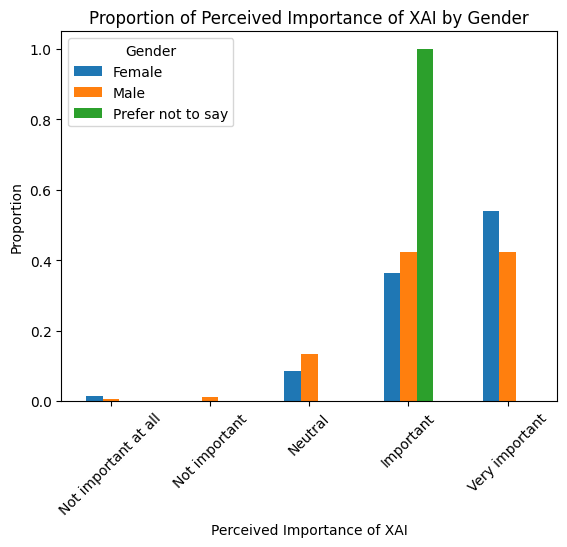

In [62]:
xai_importance_by(df, 'Gender')

In [63]:
filtered_df = df[df['Gender'] == 'Male']
male_cnt = len(filtered_df)
contingency_tbl_male = pd.crosstab(filtered_df['S3Q1'], filtered_df['Gender'])
display(contingency_tbl_male)

filtered_df = df[df['Gender'] == 'Female']
female_cnt = len(filtered_df)
contingency_tbl_female = pd.crosstab(filtered_df['S3Q1'], filtered_df['Gender']) * male_cnt / female_cnt
contingency_tbl_female = contingency_tbl_female.reindex(contingency_tbl_male.index, fill_value=0)
display(contingency_tbl_female)

alpha = 0.05
stat, pval = stats.chisquare(f_obs=contingency_tbl_female, f_exp=contingency_tbl_male)
stat = stat[0]
pval = pval[0]

print(f'Chi-Square Statistic: {stat}')
print(f'P-Value: {pval}')

if pval < alpha:
    print('Reject the null hypothesis: There is a significant difference in the distribution of perceived importance of XAI between males and females.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in the distribution of perceived importance')

Gender,Male
S3Q1,
Not important at all,1
Not important,2
Neutral,23
Important,73
Very important,73


Gender,Female
S3Q1,
Not important at all,2.233766
Not important,0.000000
Neutral,14.519481
Important,62.545455
Very important,92.701299


Chi-Square Statistic: 13.463329968454381
P-Value: 0.009220364096859529
Reject the null hypothesis: There is a significant difference in the distribution of perceived importance of XAI between males and females.


In [64]:
col_domain(df, 'S3Q1')

['Very important', 'Important', 'Neutral', 'Not important', 'Not important at all']
Categories (5, object): ['Not important at all' < 'Not important' < 'Neutral' < 'Important' < 'Very important']